In [103]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [104]:
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Задание №1

In [105]:
def create_gaussian_high_pass_mask(shape, sigma=30):
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    
    x = np.arange(cols) - center_col
    y = np.arange(rows) - center_row
    X, Y = np.meshgrid(x, y)
    distance = np.sqrt(X**2 + Y**2)
    
    gaussian_low_pass = np.exp(-(distance**2) / (2 * sigma**2))
    gaussian_high_pass = 1 - gaussian_low_pass
    
    mask = np.zeros((rows, cols, 2))
    mask[:, :, 0] = gaussian_high_pass
    mask[:, :, 1] = gaussian_high_pass
    
    return mask

def apply_gaussian_high_pass_filter(image, mask):
    dft = cv.dft(np.float32(image), flags=cv.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    dft_shift_filtered = dft_shift * mask
    f_ishift = np.fft.ifftshift(dft_shift_filtered)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    return img_back

mask = create_gaussian_high_pass_mask(img.shape)
filter_mask = mask[:, :, 0]
filtered_image = apply_gaussian_high_pass_filter(img, mask)

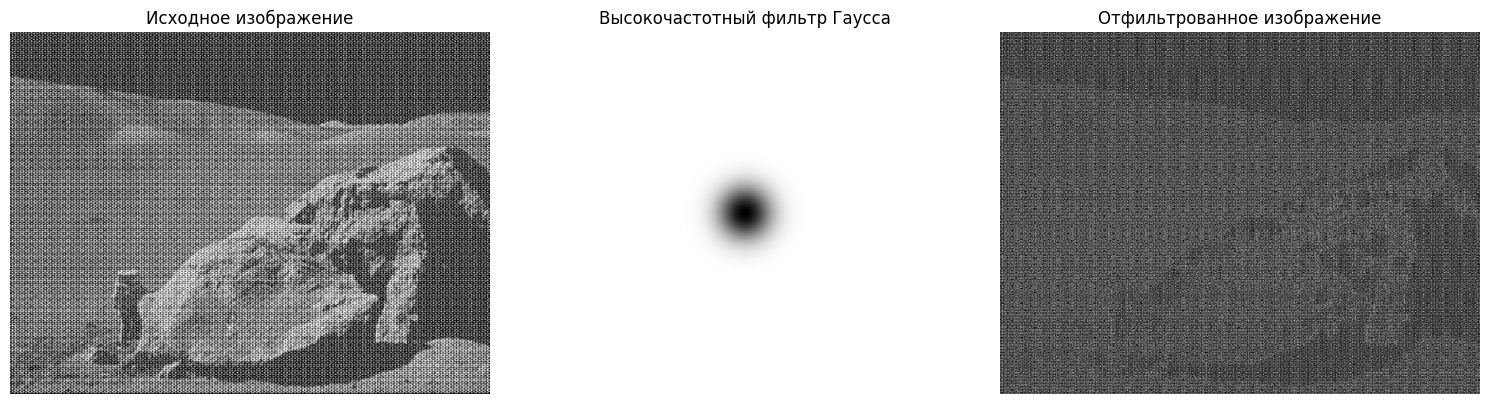

In [106]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filter_mask, cmap='gray')
plt.title('Высокочастотный фильтр Гаусса')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Отфильтрованное изображение')
plt.axis('off')

plt.tight_layout()
plt.show()

# Задание №2

In [107]:
def create_noise_mask(magnitude_spectrum, percentile=98, min_distance=50, circle_radius=3):
    rows, cols = magnitude_spectrum.shape
    center_y, center_x = rows // 2, cols // 2
    
    mask = np.ones((rows, cols, 2), np.uint8)
    
    threshold = np.percentile(magnitude_spectrum, percentile)
    noise_coords = np.where(magnitude_spectrum > threshold)
    
    for y, x in zip(noise_coords[0], noise_coords[1]):
        if abs(y - center_y) > min_distance or abs(x - center_x) > min_distance:
            cv.circle(mask, (x, y), circle_radius, (0, 0), -1)
    
    return mask

magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]) + 1)

noise_mask = create_noise_mask(magnitude_spectrum)

dft_shift_filtered = dft_shift * noise_mask

f_ishift = np.fft.ifftshift(dft_shift_filtered)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

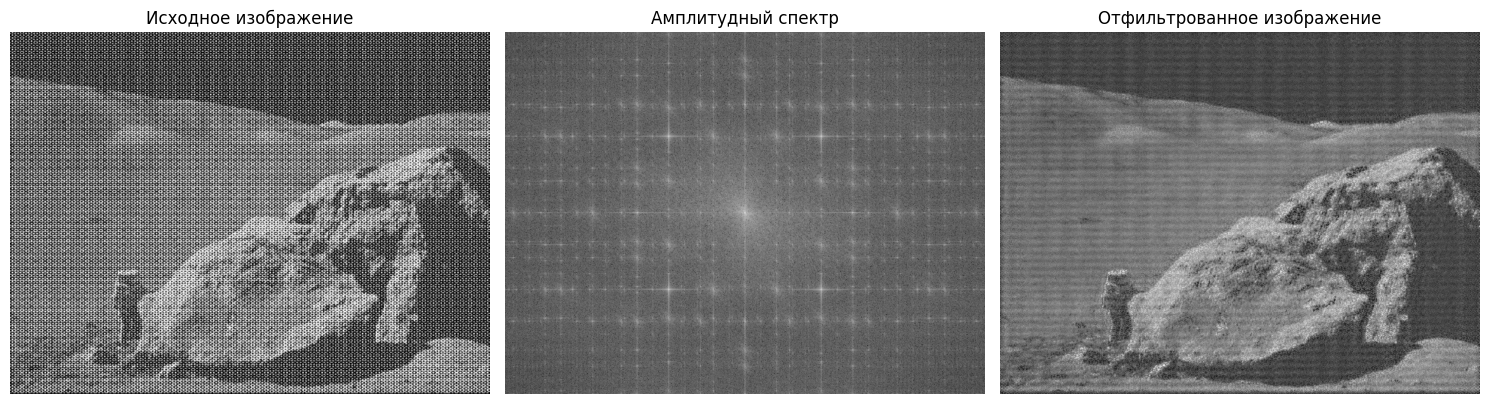

In [108]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Амплитудный спектр')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_back, cmap='gray')
plt.title('Отфильтрованное изображение')
plt.axis('off')

plt.tight_layout()
plt.show()